<a href="https://colab.research.google.com/github/KaivalyaAole/Oil_Pipeline_Accidents/blob/main/Oil_Pipeline_Accidents_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#**Uploading the Oil Pipeline Accidents, 2010-Present Dataset**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Oil Pipeline Accidents, 2010-Present.csv to Oil Pipeline Accidents, 2010-Present.csv


#**Reading the dataset**

In [ ]:
df=pd.read_csv("Oil Pipeline Accidents, 2010-Present.csv")

In [ ]:
df

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,01-01-2010 7.15,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.670700,-97.781230,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,01-04-2010 8.30,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.940280,-70.493360,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,01-05-2010 10.30,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.182400,-93.352400,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,01-06-2010 19.30,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.689300,-92.061200,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,01-07-2010 13.00,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.582660,-96.648810,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,20170015,22020,2016,12/27/2016 8:40 AM,32334,TC OIL PIPELINE OPERATIONS INC,KEYSTONE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,TINA,CARROLL,MO,39.517036,-93.486055,MATERIAL/WELD/EQUIP FAILURE,THREADED CONNECTION/COUPLING FAILURE,0.25,NaN,0.25,0.0,NO,NO,YES,12/27/2016 8:54,12/27/2016 16:11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,15.0,0.0,0.0,61000.0,0.0,61015
2791,20170028,22046,2016,12/28/2016 4:20 PM,4906,EXXONMOBIL PIPELINE CO,BRRF - CHOCTAW ETHANE/PROPANE MIX SYSTEM,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,"98.7% ETHANE, .97% METHANE, .36% PROPANE",NaN,WEST BATON ROUGE,LA,30.332597,-91.274491,ALL OTHER CAUSES,UNKNOWN,580.00,0.0,0.00,580.0,NO,NO,YES,12/28/2016 16:20,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5400.0,0.0,0.0,0.0,100000.0,105400
2792,20170027,22045,2016,12/29/2016 6:40 AM,39145,ENBRIDGE STORAGE (CUSHING) L.L.C.,CUSHING CENTRAL TERMINAL,ONSHORE,TANK,CRUDE OIL,NaN,NaN,CUSHING,PAYNE,OK,35.565292,-96.454956,MATERIAL/WELD/EQUIP FAILUR

In [ ]:
df=df.drop(['Report Number','Operator ID','Accident Date/Time','Supplemental Number'],axis=1)
df

,Accident Year,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,2010,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.670700,-97.781230,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,2010,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.940280,-70.493360,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,2010,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.182400,-93.352400,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,2010,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.689300,-92.061200,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,2010,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.582660,-96.648810,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,2016,TC OIL PIPELINE OPERATIONS INC,KEYSTONE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,TINA,CARROLL,MO,39.517036,-93.486055,MATERIAL/WELD/EQUIP FAILURE,THREADED CONNECTION/COUPLING FAILURE,0.25,NaN,0.25,0.0,NO,NO,YES,12/27/2016 8:54,12/27/2016 16:11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,15.0,0.0,0.0,61000.0,0.0,61015
2791,2016,EXXONMOBIL PIPELINE CO,BRRF - CHOCTAW ETHANE/PROPANE MIX SYSTEM,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,"98.7% ETHANE, .97% METHANE, .36% PROPANE",NaN,WEST BATON ROUGE,LA,30.332597,-91.274491,ALL OTHER CAUSES,UNKNOWN,580.00,0.0,0.00,580.0,NO,NO,YES,12/28/2016 16:20,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5400.0,0.0,0.0,0.0,100000.0,105400
2792,2016,ENBRIDGE STORAGE (CUSHING) L.L.C.,CUSHING CENTRAL TERMINAL,ONSHORE,TANK,CRUDE OIL,NaN,NaN,CUSHING,PAYNE,OK,35.565292,-96.454956,MATERIAL/WELD/EQUIP FAILURE,OTHER EQUIPMENT FAILURE,1.00,NaN,1.00,0.0,NO,NO,NO,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000.0,50.0,0.0,5000.0,3000.0,0.0,15050
2793,2017,MARATHON PIPE LINE LLC,MIDLAND STATION,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER...,NaN,INDUSTRY,BEAVER COUNTY,PA,40.631074,-80.440463,ALL OTHER C

##Over the year number of accidents in particular year has remain constant or there has been slight increase

In [ ]:
b=df['Accident City'].unique()
b

array(['MCPHERSON', 'RAYMOND', 'SULPHER', ..., 'SPEARSVILLE', 'TINA',
       'GONZALES'], dtype=object)

##**Number of Accidents in particular city**

In [ ]:
a=df['Accident City'].value_counts()
a=a[0:10]
a

CUSHING        78
PASADENA       70
HOUSTON        50
MIDLAND        45
BEAUMONT       35
PORT ARTHUR    26
CORSICANA      25
CARTERET       24
LINDEN         23
LONG BEACH     23
Name: Accident City, dtype: int64

#**Maximum no. of accidents has occured in which city?** 

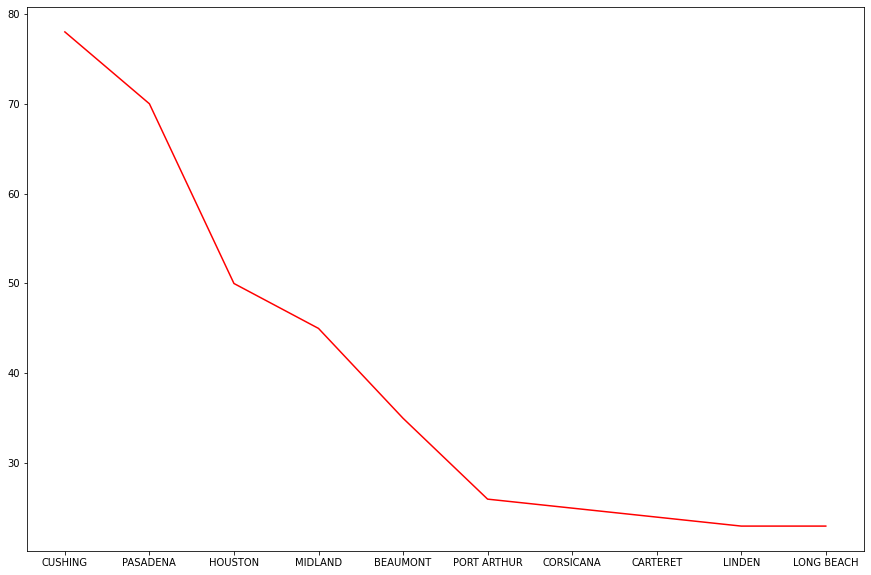

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(a,color='red')

#**Most number of accidents have occured in Cushing over the past 8 years**

#**What are the Major causes of Gas accidents?**


In [ ]:
a=df['Cause Category'].value_counts()
a


MATERIAL/WELD/EQUIP FAILURE    1435
CORROSION                       592
INCORRECT OPERATION             378
NATURAL FORCE DAMAGE            118
ALL OTHER CAUSES                118
EXCAVATION DAMAGE                97
OTHER OUTSIDE FORCE DAMAGE       57
Name: Cause Category, dtype: int64

#**1] Equipment Failure**
#**2] Corrosion**
#**-->Solution: Sensors**

In [ ]:
df1=df[df['Cause Category']=="MATERIAL/WELD/EQUIP FAILURE"]
df1['Cause Subcategory'].value_counts()

PUMP OR PUMP-RELATED EQUIPMENT                       296
NON-THREADED CONNECTION FAILURE                      286
OTHER EQUIPMENT FAILURE                              204
MALFUNCTION OF CONTROL/RELIEF EQUIPMENT              171
THREADED CONNECTION/COUPLING FAILURE                 151
CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED    112
MANUFACTURING-RELATED                                 70
FAILURE OF EQUIPMENT BODY                             67
DEFECTIVE OR LOOSE TUBING/FITTING                     62
ENVIRONMENTAL CRACKING-RELATED                        16
Name: Cause Subcategory, dtype: int64

#**What are the pipe-line Accidents location?**

In [ ]:
df['Pipeline Location'].unique()

array(['ONSHORE', 'OFFSHORE'], dtype=object)

##**Onshore and Offshore are the accidents location**

In [ ]:
df['Pipeline Location'].value_counts()

ONSHORE     2777
OFFSHORE      18
Name: Pipeline Location, dtype: int64

In [ ]:
fig = go.Figure(px.scatter_geo(
        lon = df['Accident Longitude'],
        lat = df['Accident Latitude'],
        color = df['Pipeline Location'],
        ))

fig.update_layout(
        title = 'Locations of Accidents',
        geo_scope='usa',
        
    )
fig.show()

#**Almost all the accidents have occured Onshore**

#**What are the different types of pipelines**

In [ ]:
df['Pipeline Type'].unique()

array(['ABOVEGROUND', 'UNDERGROUND', 'TANK', nan, 'TRANSITION AREA'],
      dtype=object)

In [ ]:
df['Pipeline Type'].value_counts()

ABOVEGROUND        1475
UNDERGROUND         985
TANK                301
TRANSITION AREA      16
Name: Pipeline Type, dtype: int64

#**In most of the accidents the pipeline type has been Aboveground or Underground**

#**Which product is responsible for major accidents?**

In [ ]:
df['Liquid Type'].unique()

array(['HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS', 'CRUDE OIL',
       'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID',
       'CO2 (CARBON DIOXIDE)',
       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)'],
      dtype=object)

In [ ]:
df['Liquid Type'].value_counts()

CRUDE OIL                                               1398
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       939
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               418
CO2 (CARBON DIOXIDE)                                      38
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)       2
Name: Liquid Type, dtype: int64

#**In most of the scenario when the accident occured Liquid product was found like CRUDE OIL and Refined Petroleum Product at the accident site.**

In [ ]:
b=df['Operator Name'].unique()
len(b)

229

##**Accident have occured at 229 operator site** 

#**Which operator is accident prone?**

In [ ]:
a=df['Operator Name'].value_counts()
a=a[0:10]
a

ENTERPRISE CRUDE PIPELINE LLC          195
SUNOCO PIPELINE L.P.                   180
PLAINS PIPELINE, L.P.                  156
ENTERPRISE PRODUCTS OPERATING LLC      155
MAGELLAN PIPELINE COMPANY, LP          140
COLONIAL PIPELINE CO                   136
BUCKEYE PARTNERS, LP                   115
MARATHON PIPE LINE LLC                  87
KINDER MORGAN LIQUID TERMINALS, LLC     87
PHILLIPS 66 PIPELINE LLC                80
Name: Operator Name, dtype: int64

#**Most number of accident occurences where reported from ENTERPRISE CRUDE PIPELINE LLC**

In [ ]:
b=a.index.tolist()

In [ ]:
b

['ENTERPRISE CRUDE PIPELINE LLC',
 'SUNOCO PIPELINE L.P.',
 'PLAINS PIPELINE, L.P.',
 'ENTERPRISE PRODUCTS OPERATING LLC',
 'MAGELLAN PIPELINE COMPANY, LP',
 'COLONIAL PIPELINE CO',
 'BUCKEYE PARTNERS, LP',
 'MARATHON PIPE LINE LLC',
 'KINDER MORGAN LIQUID TERMINALS, LLC',
 'PHILLIPS 66 PIPELINE LLC']

#**Analysis of accidents at operator's site and it's reason...**

In [ ]:
for i in range(10):
  df1=df[df['Operator Name']==b[i]]
  print(b[i],"\n")
  print("Cause Category")
  a=df1['Cause Category'].value_counts()
  print(a)
  print("\n")
  print("Pipeline Type")
  a=df1['Pipeline Type'].value_counts()
  print(a)
  print("\n")
  print("Liquid Type")
  a=df1['Liquid Type'].value_counts()
  print(a)
  print("\n")

ENTERPRISE CRUDE PIPELINE LLC 

Cause Category
MATERIAL/WELD/EQUIP FAILURE    88
CORROSION                      56
INCORRECT OPERATION            25
ALL OTHER CAUSES               21
EXCAVATION DAMAGE               2
NATURAL FORCE DAMAGE            2
OTHER OUTSIDE FORCE DAMAGE      1
Name: Cause Category, dtype: int64


Pipeline Type
ABOVEGROUND    111
UNDERGROUND     60
TANK            24
Name: Pipeline Type, dtype: int64


Liquid Type
CRUDE OIL                                             194
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID      1
Name: Liquid Type, dtype: int64


SUNOCO PIPELINE L.P. 

Cause Category
CORROSION                      79
MATERIAL/WELD/EQUIP FAILURE    64
INCORRECT OPERATION            24
NATURAL FORCE DAMAGE            4
EXCAVATION DAMAGE               3
OTHER OUTSIDE FORCE DAMAGE      3
ALL OTHER CAUSES                3
Name: Cause Category, dtype: int64


Pipeline Type
UNDERGROUND        84
ABOVEGROUND        84
TANK               11
TRANSITION AREA 

#**Most of the accidents have occured due to Equipment Failure and Crude Oil and Petroleum product have been found at the site**

In [ ]:
a=df['All Costs'].unique()

In [ ]:
a.sort()

In [ ]:
a=np.asarray(a[::-1]).tolist()

In [ ]:
sum(a)/len(a)

1016863.8556384379

#**Estimated loss when an accident occur was 1 million dollar**

In [ ]:
df

,Accident Year,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,2010,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.670700,-97.781230,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,2010,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.940280,-70.493360,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,2010,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.182400,-93.352400,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,2010,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.689300,-92.061200,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,2010,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.582660,-96.648810,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,2016,TC OIL PIPELINE OPERATIONS INC,KEYSTONE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,TINA,CARROLL,MO,39.517036,-93.486055,MATERIAL/WELD/EQUIP FAILURE,THREADED CONNECTION/COUPLING FAILURE,0.25,NaN,0.25,0.0,NO,NO,YES,12/27/2016 8:54,12/27/2016 16:11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,15.0,0.0,0.0,61000.0,0.0,61015
2791,2016,EXXONMOBIL PIPELINE CO,BRRF - CHOCTAW ETHANE/PROPANE MIX SYSTEM,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,"98.7% ETHANE, .97% METHANE, .36% PROPANE",NaN,WEST BATON ROUGE,LA,30.332597,-91.274491,ALL OTHER CAUSES,UNKNOWN,580.00,0.0,0.00,580.0,NO,NO,YES,12/28/2016 16:20,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5400.0,0.0,0.0,0.0,100000.0,105400
2792,2016,ENBRIDGE STORAGE (CUSHING) L.L.C.,CUSHING CENTRAL TERMINAL,ONSHORE,TANK,CRUDE OIL,NaN,NaN,CUSHING,PAYNE,OK,35.565292,-96.454956,MATERIAL/WELD/EQUIP FAILURE,OTHER EQUIPMENT FAILURE,1.00,NaN,1.00,0.0,NO,NO,NO,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000.0,50.0,0.0,5000.0,3000.0,0.0,15050
2793,2017,MARATHON PIPE LINE LLC,MIDLAND STATION,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER...,NaN,INDUSTRY,BEAVER COUNTY,PA,40.631074,-80.440463,ALL OTHER C

In [ ]:
b=df['Accident Year'].unique()
c=df['Unintentional Release (Barrels)'].value_counts()
c

1.00      170
2.00      107
0.24       98
3.00       83
0.20       75
         ... 
8.78        1
704.00      1
4.14        1
1.38        1
580.00      1
Name: Unintentional Release (Barrels), Length: 697, dtype: int64

#**Average total Loss over the years**

In [ ]:
for i in b:
  df1=df[df['Accident Year']==i]
  print(i,"\n")
  print("All Costs")
  a=df1['All Costs'].unique()
  a.sort()
  a=np.asarray(a[::-1]).tolist()
  print(sum(a)/len(a))
  print(sum(df1['Unintentional Release (Barrels)'].unique())/len(df1['Unintentional Release (Barrels)'].unique()))
  print("\n")

2010 

All Costs
3199438.4523809524
587.3282142857144


2011 

All Costs
828602.8
502.76252941176466


2012 

All Costs
418964.3092485549
237.76035087719305


2013 

All Costs
724695.9375
637.0477348066295


2014 

All Costs
321779.775862069
233.4351366120219


2015 

All Costs
587907.2784222738
503.3104040404042


2016 

All Costs
447424.3854166667
341.72364485981313


2017 

All Costs
43614.0
2.1




#**From Data analysis it is visble that average loss when an accident occcurs have reduced substantially**

In [ ]:
df['Liquid Explosion'].value_counts()

NO     2780
YES      15
Name: Liquid Explosion, dtype: int64

In [ ]:
df['Pipeline Shutdown'].value_counts()

YES    1395
NO     1188
Name: Pipeline Shutdown, dtype: int64

#**Pipeline shutdown has taken place on 50% of accident occasions**